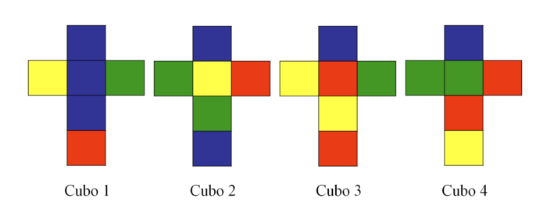

In [252]:
cubo_1 = [('A', 'A'),('AM','V'),('A','R')]
cubo_2 = [('V', 'R'),('A', 'V'),('AM', 'A')]
cubo_3 = [('V', 'AM'),('R','R'),('A','AM')]
cubo_4 = [('AM','V'),('V','R'),('R','A')]
cubos = [cubo_1,cubo_2,cubo_3,cubo_4]

def crea_grafo_cubos(cubos):
    G = Graph(loops=True, multiedges=True)
    for i, edges_ci in enumerate(cubos):
        G.add_edges(map(lambda x: tuple(list(x) + [str(i+1)]) , edges_ci))
    
    return G

In [253]:
Gcubos = crea_grafo_cubos(cubos)

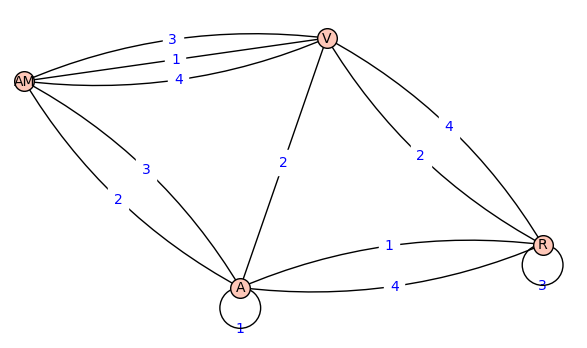

In [254]:
plot(Gcubos, edge_labels=True)

In [255]:
def all_cycles(graph):
    G = Graph(graph)    
    cycleSet =set()
    for e in G.edges(labels=True):
        G.delete_edge(e)
        if e[0] == e[1] :
            cycleSet.add(tuple(set([e])))
        else:
            for path in G.all_paths(e[1], e[0], use_multiedges=True, report_edges=True, labels = True):
                cycleSet.add(tuple(set([e] + list(path))))
    return list(cycleSet)

In [256]:
ciclos = all_cycles(Gcubos)

In [257]:
ciclos

[(('A', 'AM', '2'), ('AM', 'V', '1'), ('A', 'R', '4'), ('R', 'V', '2')),
 (('A', 'AM', '2'), ('A', 'V', '2'), ('AM', 'V', '4')),
 (('AM', 'V', '1'), ('A', 'AM', '3'), ('R', 'V', '4'), ('A', 'R', '1')),
 (('A', 'V', '2'), ('A', 'AM', '3'), ('AM', 'V', '4')),
 (('A', 'V', '2'), ('AM', 'V', '1'), ('A', 'AM', '3')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('A', 'R', '4'), ('R', 'V', '4')),
 (('A', 'V', '2'), ('A', 'R', '1'), ('R', 'V', '2')),
 (('A', 'AM', '2'), ('AM', 'V', '1'), ('R', 'V', '4'), ('A', 'R', '1')),
 (('A', 'A', '1'),),
 (('R', 'V', '4'), ('A', 'R', '4'), ('A', 'AM', '3'), ('AM', 'V', '3')),
 (('R', 'V', '4'), ('A', 'AM', '2'), ('A', 'R', '4'), ('AM', 'V', '4')),
 (('A', 'AM', '2'), ('A', 'V', '2'), ('AM', 'V', '3')),
 (('A', 'AM', '2'), ('AM', 'V', '4'), ('A', 'R', '1'), ('R', 'V', '2')),
 (('R', 'V', '4'), ('A', 'AM', '2'), ('AM', 'V', '4'), ('A', 'R', '1')),
 (('A', 'AM', '3'), ('AM', 'V', '3'), ('A', 'R', '1'), ('R', 'V', '2')),
 (('A', 'V', '2'), ('R', 'V', '4'), ('A', 'R

In [259]:
subgrafos_buenos = list(filter(lambda x: len(x)==4 and  set(map(lambda y: y[2], x))=={'1','2','3','4'}, ciclos))
subgrafos_pendientes = list(filter(lambda x: len(x)<4, ciclos))

print(subgrafos_buenos)

[(('A', 'AM', '3'), ('AM', 'V', '4'), ('A', 'R', '1'), ('R', 'V', '2')), (('R', 'V', '4'), ('A', 'AM', '2'), ('AM', 'V', '3'), ('A', 'R', '1')), (('A', 'R', '4'), ('AM', 'V', '1'), ('A', 'AM', '3'), ('R', 'V', '2'))]


In [260]:
subgrafos_pendientes 

[(('A', 'AM', '2'), ('A', 'V', '2'), ('AM', 'V', '4')),
 (('A', 'V', '2'), ('A', 'AM', '3'), ('AM', 'V', '4')),
 (('A', 'V', '2'), ('AM', 'V', '1'), ('A', 'AM', '3')),
 (('A', 'V', '2'), ('A', 'R', '1'), ('R', 'V', '2')),
 (('A', 'A', '1'),),
 (('A', 'AM', '2'), ('A', 'V', '2'), ('AM', 'V', '3')),
 (('A', 'V', '2'), ('R', 'V', '4'), ('A', 'R', '1')),
 (('A', 'V', '2'), ('A', 'R', '4'), ('R', 'V', '4')),
 (('AM', 'V', '1'), ('AM', 'V', '4')),
 (('AM', 'V', '1'), ('AM', 'V', '3')),
 (('A', 'AM', '2'), ('A', 'AM', '3')),
 (('R', 'R', '3'),),
 (('AM', 'V', '3'), ('AM', 'V', '4')),
 (('A', 'V', '2'), ('A', 'R', '4'), ('R', 'V', '2')),
 (('R', 'V', '4'), ('R', 'V', '2')),
 (('A', 'R', '4'), ('A', 'R', '1')),
 (('A', 'V', '2'), ('A', 'AM', '3'), ('AM', 'V', '3')),
 (('A', 'V', '2'), ('A', 'AM', '2'), ('AM', 'V', '1'))]

In [261]:
while subgrafos_pendientes:
    actual = subgrafos_pendientes.pop(0)
    if len(actual)==4:
        if set(map(lambda y: y[2], actual))=={'1','2','3','4'}:
            subgrafos_buenos.append(actual)
    else:
        for c in subgrafos_pendientes:
            v_in_c = set(sum(map(lambda x: x[:2], c), ()))
            if (v_in_c.intersection(set(sum(map(lambda y: y[:2], actual), ()))) == set()) and (len(c)+len(actual)) <= 4:
                subgrafos_pendientes.append(actual + c)            

In [262]:
subgrafos_buenos

[(('A', 'AM', '3'), ('AM', 'V', '4'), ('A', 'R', '1'), ('R', 'V', '2')),
 (('R', 'V', '4'), ('A', 'AM', '2'), ('AM', 'V', '3'), ('A', 'R', '1')),
 (('A', 'R', '4'), ('AM', 'V', '1'), ('A', 'AM', '3'), ('R', 'V', '2'))]

In [263]:
soluciones = []
for i,s1 in enumerate(subgrafos_buenos):
    for s2 in subgrafos_buenos[i+1:]:
        if set(s1).intersection(s2) == set():
            soluciones.append((s1,s2))

In [264]:
soluciones

[((('R', 'V', '4'), ('A', 'AM', '2'), ('AM', 'V', '3'), ('A', 'R', '1')),
  (('A', 'R', '4'), ('AM', 'V', '1'), ('A', 'AM', '3'), ('R', 'V', '2')))]